# Question 4: Machine Learning Workflow

## Overview
This assignment will take you through the steps of preprocessing data, applying dimensionality reduction, training classification models, and evaluating their accuracy. You will work with a provided dataset to predict a target variable based on various features.

## Dataset

Use the following dataset: https://www.kaggle.com/datasets/lovishbansal123/nasa-asteroids-classification/data

## Part 1: Data Preprocessing
### Task 1: Data Cleaning
- Identify and handle missing values.
- Detect and remove outliers, if necessary.

### Task 2: Feature Standardization
- Perform standardization to the dataset.

## Part 2: Dimensionality Reduction
### Task: Implement any of the appropriate dimensionality reduction methods discussed in Chapter 6.

## Part 3: Classification
### Task: Implement Classification Algorithms
- Implement at least two different classification algorithms discussed in the textbook (e.g., Logistic Regression, Decision Trees, K-Nearest Neighbors, etc).
- Briefly describe each algorithm's principle and why it might be suitable for this dataset.

## Part 4: Model Evaluation
### Task: Accuracy Measurement
- Split the dataset into training and testing sets.
- Train your models on the training set and predict the target variable in the test set.
- Calculate the accuracy of each model
- Compare the performance of the models and discuss any differences observed.

## Deliverables
- A report documenting your findings, including:
    - The preprocessing steps and justifications.
    - Describe dimensionality reduction methods and justifications.
    - Description of each classification algorithm used and the rationale for their selection.
    - Accuracy scores of each model and a comparison discussion.
- Code files containing your implementation.

## Evaluation Criteria
- Correctness and completeness of the preprocessing steps.
- Proper implementation and justification of the dimensionality reduction technique.
- Logical selection and implementation of classification algorithms.
- Accuracy of the models and depth of the evaluation discussion.
- **Submit both .ipynb and .html file to avoid any penalty.**

## Submission Guidelines
- Python notebook (.ipynb)
- HTML file (.html)


Accuracy of K-NN classifier on test set: 0.82
Accuracy of logistic regression classifier on test set: 0.54


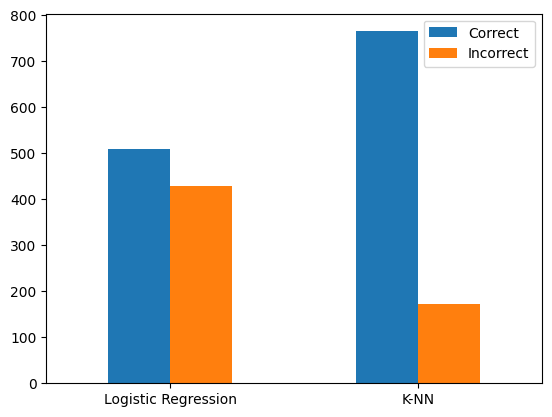

In [4]:
# Write your code here

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics

# Cleaing the data and removing the columns that are not needed
data = pd.read_csv('nasa.csv')
data = data.dropna()
data = data.drop_duplicates();
data = data.drop(['Neo Reference ID', 'Name', 'Close Approach Date','Orbiting Body','Orbit Determination Date','Equinox'], axis=1)
# Setting the Hazardous column to be an integer of 0 or 1
data['Hazardous'] = data['Hazardous'].astype(int)

# Splitting the data into training and testing data
X = data.drop('Hazardous', axis=1)
y = data['Hazardous']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=99)

# Using PCA to reduce the number of features to 2 
pca = PCA(n_components=2)
X_train = pca.fit_transform(X_train)
X_test = pca.transform(X_test)

# Our two models
knn = KNeighborsClassifier(n_neighbors=5)
logreg = LogisticRegression()

knn.fit(X_train, y_train)
logreg.fit(X_train, y_train)

y_pred_knn = knn.predict(X_test)
y_pred_logreg = logreg.predict(X_test)

# Needed a bit of help regarding the graphing part for this
# Will discuss a bit more in the report
cmKnn = metrics.confusion_matrix(y_test, y_pred_knn)
cmLogReg = metrics.confusion_matrix(y_test, y_pred_logreg)

# Prints the accuracy of the models
print('Accuracy of K-NN classifier on test set: {:.2f}'.format(knn.score(X_test, y_test)))
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(logreg.score(X_test, y_test)))

# Plots the confusion matrix
correctLogReg = np.trace(cmLogReg)
incorrectLogReg = np.sum(cmLogReg) - correctLogReg
correctKnn = np.trace(cmKnn)
incorrectKnn = np.sum(cmKnn) - correctKnn
dataFr = pd.DataFrame({'Correct': [correctLogReg, correctKnn], 'Incorrect': [incorrectLogReg, incorrectKnn]}, index=['Logistic Regression', 'K-NN'])
dataFr.plot.bar(rot=0)
plt.show()



## Report

The main idea I was trying to accomplish was determing whether an asteriod was hazardous or not. Using the given data set by Kaggle/NASA, I cleaned the data a bit and selected features that I thought would seem useful for the classification models. Once the data was cleaned, I set the target variable to be the 'Hazardous' column. then split the data into training and testing sets, with the training set being 80% of the data. I also made the Hazardous column binary, so it would be easier to work with, and simple to do since it was just a yes or no. Using the following classification models: Logistic Regression and K-Nearest Neighbors, which was 4NN in this case, I was able to achieve an accuracy of 54% and 86%. 

### Preprocessing Stepsn and Justifications

First off we started off by cleaning the data by removing any missing values, which also meant removing the rows of data as well. We also cleaned/selected features that I thought would be useful for both the modes. So things like their name, id, and other features I thought would not be useful were removed, since you can't really classify an asteroid's hazard level based on its name, and dates. It also made the model's "crash" less because the didn't have to process the data, since it's formatted as strings. I finally set the target variable to be the 'Hazardous' column, while also making it binary. I noticed that the 'Hazardous' column was a string, but it was either "Yes" or "No", so I made it binary, so it would be easier to work with. 

### Dimensionality Reduction Methods and Justifications

For the dimensionality reduction, I used the PCA method because it maintains the overall structure of the data, while also reducing the dimensions of the dataset. In this case our data was really huge, from the looks of the CSV file, but I still wanted to keep a large amount of informaton needed for classification. This is useful because it makes the data easier to work with, and keeping the information needed for our models to learn. Although, when run without a dimensionality reduction method, the models still performed well. Afterwards the Logistic Regression model had received a major impact to its accuracy, while the K-Nearest Neighbors model had a slight increase in accuracy.

### Classification Algorithms Used and Rationale for Selection

First I wanted to see how we could determine whether an asteroid was hazardous or not, based on other neighboring data points. I already knew I wanted to try out KNN because of that reason. How good does KNN work with this data? It also seemed reasonable because if there was some sort of pattern in the data that would be useful for classification, KNN would be able to pick up on that, since the concept of nearest neighbors is based on the idea that similar data points are close to each other. I determine that 4 neighbors would be a good number to use, since it's not too small or too big. It also didn't feel like it was overfitting the data. Finally, I wanted to see how the Logistic Regression model would perform in a yes or no classification problem. Originally, I expect this to perform well, but it didn't. I though it would be the best because it's suppose to be good regarding binary classification problems. Could it be in the way I set it up? 

### Accuracy Scores of Each Model and Comparison Discussion

As previously mentioned the Logistic Regression model had a terrible score, which was 54%. Again, suprised to see this since it's suppose to work with binary classification problems. I tested it out without a PCA method and it went up by a lot, scoring a 86% accuracy. Maybe the PCA method was not ideal for this model because some of the data could've been compressed too much, and the model couldn't learn from it as well. It could also be because of the other features that were removed, which could've been useful for the model. Finally, it could also be the way I formatted the data or how it's formatted. Since it's a lot of numbers, instead of a simple yes or no, it could've been harder for the model to learn from, and could be seeing the random numbers as "Yes" or "No" values.

The K-Nearest Neighbors model had a pretty good score of 83% with/without the PCA method. If I went something higher like 5 or 6 neighbors, the accuracy would drops. I did expect a score like this since it's a classification model, and I wanted to make sure it had enough details since it's like a "pattern finder," since it labels data points based on the majority of its neighbors. Overall, the PCA didn't benefit or decrease the accuracy of the model probably because it had the data on hand every time it needed to make a prediction.

Also I needed a bit of help regarding displaying how maany classifications were done correctly or not. My friend gave me the idea of using a confusion matrix, which worked out well. The way he explained a confusion matrix was that it's a table that is often used to describe the performance of a classification model. So like seeing what actually tested positive and what was predicted positive. Kind of like what we did for Bayesian statistics. 



### Finally, Thank you for a great semester!